# Exercises - Time Series

### Exercise 1:

Create a variable with today's date and your time. Then convert it into a datetime object using pandas. Use type to display that it is a datetime object.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
timestamp = '2020-06-10 3:45pm'
tstamp=pd.to_datetime(timestamp)
type(tstamp)

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [ ]:
dates=[ '2016-02-11', '2016-07-01', '2016-07-09', '2016-10-08',
    '2017-02-18', '2017-02-25', '2017-05-02', '2017-08-26', '2017-12-15', '2018-02-11']
    
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dateslist = list(zip(nums, dates))

df = pd.DataFrame(data=dateslist, columns=['nums', 'dates'])
df

### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [ ]:
daytime=pd.datetime(2017, 12, 15);
print(daytime)
dtime=pd.to_datetime(daytime, dayfirst=True)
print(dtime)

In [ ]:
daytime='8th of October 2016'
print(daytime)
dtime=pd.to_datetime(daytime, dayfirst=True)
print(dtime)

In [ ]:
daytime=' 20180211'
print(daytime)
dtime=pd.to_datetime(daytime, dayfirst=True)
print(dtime)

In [ ]:
daytime='2017-02-25'
print(daytime)
dtime=pd.to_datetime(daytime, dayfirst=True)
print(dtime)

In [ ]:
daytime='2019-Jan-16'
print(daytime)
dtime=pd.to_datetime(daytime, dayfirst=True)
print(dtime)

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [ ]:
s = pd.Series(pd.date_range('2012-1-1 00:00:00', periods=5, freq='H'))
td = pd.Series([ pd.Timedelta('P0DT1H45M0S') for i in range(5) ])
print(td)

### Exercise 5:

Using the pandas library, create a time delta range with 20 business days starting from today's date.

In [ ]:
s = pd.Series(pd.date_range('2020-1-1', periods=20, freq='D'))
s

### Exercise 6:

Download the "travel_times.csv" file and upload it to your datasets folder. Then using pandas, read the file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

In [101]:
traveltimes_df = pd.read_csv('travel_times.csv', index_col="Date", parse_dates=True)
traveltimes_df.head()

,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
Date,,,,,,,,,,,,
2012-01-06,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
2012-01-06,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2012-01-04,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
2012-01-04,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
2012-01-03,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [ ]:
#hourly intervals are too narrow to make sense of data
#aggregate as weekly data instead
avgTravel = traveltimes_df.resample('W').mean()
avgTravel.head()

In [ ]:
# plot data by week
avgTravel.plot(style=[':', '--', '-']) #line styles for each feature
plt.ylabel('Travel Times')

### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

In [104]:
by_weekday = traveltimes_df.groupby(traveltimes_df.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']

by_weekday

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
Mon,50.795897,127.017949,73.197436,81.405128,43.197436,38.146154
Tue,51.127500,128.235417,73.781250,80.893750,42.520833,38.427083
Wed,51.073191,127.059574,72.229787,79.348936,43.170213,39.085106
Thur,50.902727,127.986364,74.365909,82.809091,41.177273,37.418182
Fri,50.958889,127.559259,81.659259,87.937037,37.922222,35.114815


### Exercise 8:

Using the datafram figure out the Avgmoving speed going to GSK on each day and the Avgmoving speed  going to home on each day as well, then plot the graphs. Add a line style this time.

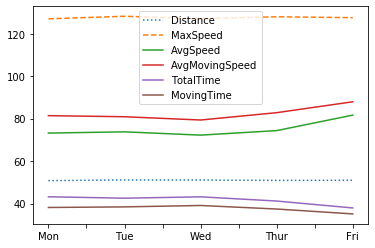

In [105]:
by_weekday.plot(style=[':','--','-'])

### Exercise 9:

Using the dataframe make a new column for the months that are in the dataset.

In [ ]:
avgTravel.columns

In [ ]:
avgTravel['MONTH'] = avgTravel.eval(avgTravel.index.values)
avgTravel.head()

In [ ]:
listIndex=avgTravel.index.tolist()

In [ ]:
listIndex; 
avgTravel['MONTH'] = listIndex; 
avgTravel.head()

In [ ]:
dt_object = listIndex(map(pd.datetime.date.fromtimestamp, timestamp))

In [ ]:
first = listIndex[0]; 
for ls in listIndex:
    ls=ls.to_pydatetime(); 
type(first)

In [106]:
avgTravel['MONTH'] = pd.to_datetime(avgTravel['MONTH'])

avgTravel['MONTH'] = avgTravel['MONTH'].dt.month
avgTravel

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,MONTH
Date,,,,,,,
2011-07-17,51.967500,126.775000,64.525000,87.975000,48.925000,35.700000,7
2011-07-24,51.156250,125.662500,75.612500,88.400000,42.500000,35.212500,7
2011-07-31,49.956000,124.720000,71.410000,78.120000,44.600000,39.630000,7
2011-08-07,50.811250,125.112500,72.400000,79.712500,42.175000,38.262500,8
2011-08-14,50.660000,128.310000,71.960000,79.550000,42.460000,38.350000,8
2011-08-21,50.430000,129.350000,71.140000,78.180000,43.250000,38.990000,8
2011-08-28,50.237000,129.290000,76.070000,82.920000,40.590000,37.200000,8
2011-09-04,50.548000,131.320000,72.220000,80.710000,42.230000,37.760000,9
2011-09-11,51.305000,130.616667,73.150000,80.033333,43.933333,39.383333,9


### Exercise 10:

Now with the new months column figure out the average total time that it took to go to home and to go to GSK. Plot both graphs and display it.

In [116]:
by_month = avgTravel.groupby(avgTravel['MONTH']).mean()
by_month.index = [1, 2, 3, 4, 5, 6,7]

by_month

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
1,50.836250,130.112500,80.575000,86.562500,37.900000,35.262500
2,51.026583,125.719167,70.515833,84.831667,45.341667,36.847500
3,50.534562,128.015625,72.892500,80.090625,42.118750,38.200625
4,50.817938,129.637292,73.739375,80.748333,42.415833,38.254583
5,51.093033,127.418000,78.835611,86.396611,39.423444,36.249444
6,51.708194,127.129861,71.831250,78.231597,44.373958,40.321875
7,51.065174,126.244792,74.092361,80.588889,41.638542,38.213194


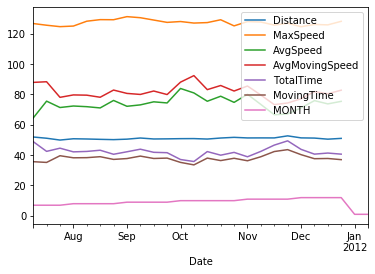

In [117]:
#rename columns with shorter name
#create a new column 'Total' with combined values of west and east columns
#avgTravel.columns = ['MONTH', 'AvgSpeed']
avgTravel.plot()